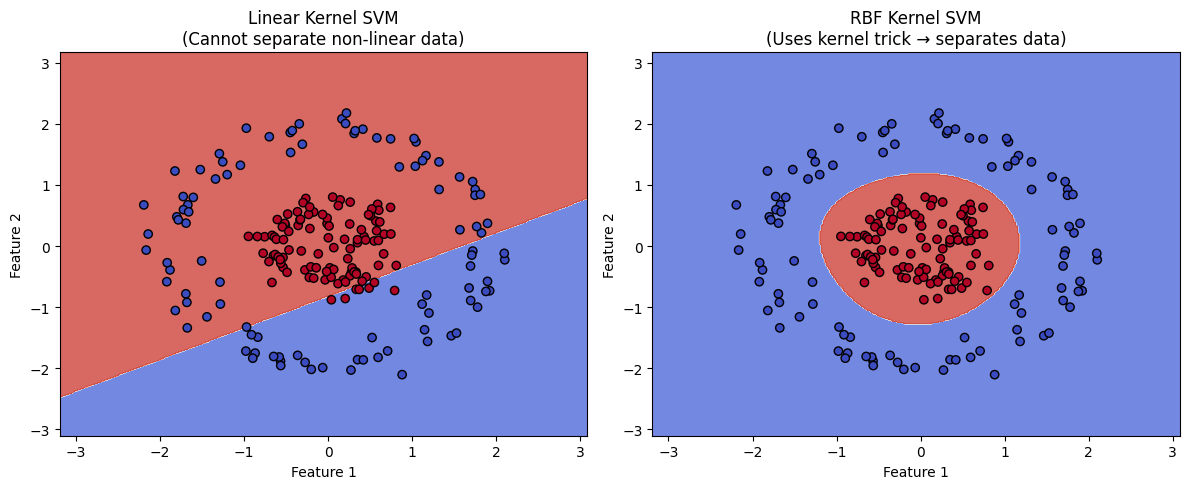

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate a non-linear dataset (circles)
X, y = datasets.make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)

# Scale the data (good practice for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train two SVMs: one with linear kernel, one with RBF (Gaussian) kernel
svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1)

svm_linear.fit(X, y)
svm_rbf.fit(X, y)

# Create a mesh to plot decision boundaries
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh
Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape for plotting
Z_linear = Z_linear.reshape(xx.shape)
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear SVM
axes[0].contourf(xx, yy, Z_linear, alpha=0.8, cmap=plt.cm.coolwarm)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
axes[0].set_title("Linear Kernel SVM\n(Cannot separate non-linear data)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# RBF Kernel SVM (uses the kernel trick)
axes[1].contourf(xx, yy, Z_rbf, alpha=0.8, cmap=plt.cm.coolwarm)
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
axes[1].set_title("RBF Kernel SVM\n(Uses kernel trick → separates data)")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()